In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import polarSumStats as polar

In [2]:
simdir = '/home/groups/burchat/chebert/psfwsPaperSims/'

In [3]:
d = pickle.load(open(simdir+'rand150.p', 'rb'))

### LARGE SCALES 

In [4]:
import psfws

In [5]:
kk_b = polar.compGG2pcf(d['thx'], d['thy'], d['e1'], d['e2'], 'big', 'TwoD')
polarKk_b = polar.get2pcfPolar(kk_b, True)
ann_b = polar.get2pcfAnnulus(polarKk_b, 1.8, .2, True)
annHist_b = polar.get2pcfSlice(ann_b, 30, True)

In [6]:
gl = d['atmKwargs']['direction'][0].rad%np.pi
fa = np.average([d.rad%np.pi for d in d['atmKwargs']['direction'][1:]], weights=d['atmKwargs']['speed'][1:])
xs = np.linspace(-2,2,100)

In [7]:
obs, sky = psfws.utils.get_both_nez(90,30, lat=30.2446, lon=70.749)

In [8]:
glvec = np.sin(gl)*obs[0] + np.cos(gl)*obs[1]
glSky = np.dot(sky, glvec)
alpha_gl = np.arctan2(glSky[1], glSky[0])

favec = np.sin(fa)*obs[0] + np.cos(fa)*obs[1]
faSky = np.dot(sky, favec)
alpha_fa = np.arctan2(faSky[1], faSky[0])

## xi plus

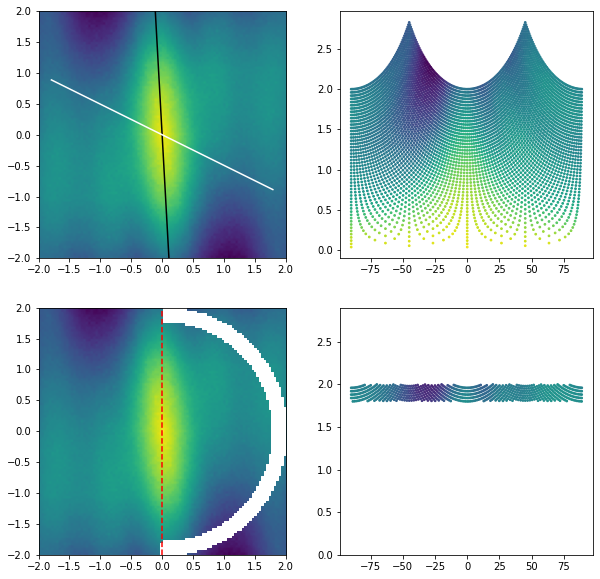

In [9]:
f, a = plt.subplots(2,2, figsize=(10,10))

vmax=max(kk_b.xip.flatten())
vmin=min(kk_b.xip.flatten())

a[0,0].imshow(kk_b.xip, extent=[-kk_b.max_sep, kk_b.max_sep, -kk_b.max_sep, kk_b.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)
a[0,0].plot(xs * np.cos(alpha_gl), xs * np.sin(alpha_gl), 'k')
a[0,0].plot(xs * np.cos(alpha_fa), xs * np.sin(alpha_fa), 'w')

a[0,1].scatter(polarKk_b.theta, polarKk_b.r, c=polarKk_b.xiP, vmin=vmin, vmax=vmax, s=3)

a[1,0].imshow(kk_b.xip, extent=[-kk_b.max_sep, kk_b.max_sep, -kk_b.max_sep, kk_b.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)
a[1,0].scatter(ann_b.r * np.cos(ann_b.theta * np.pi/180),
               ann_b.r * np.sin(ann_b.theta * np.pi/180), marker='s', color='w', s=10)
a[1,0].axvline(0, linestyle='--', color='r')

a[1,1].scatter(ann_b.theta, ann_b.r, c=ann_b.xiP, s=3, vmin=vmin, vmax=vmax)
a[1,1].set_ylim([0,2.9]);

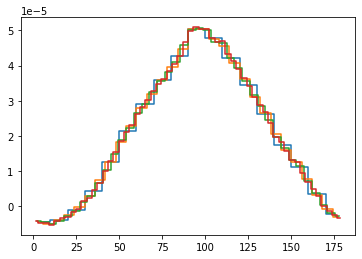

In [6]:
for bins in [18,30,40,58]:
    annHistP,_, annbins = polar.get2pcfSlice(ann_b, bins, True)
    plt.plot(annbins, annHistP, ds='steps-mid')

## xi minus

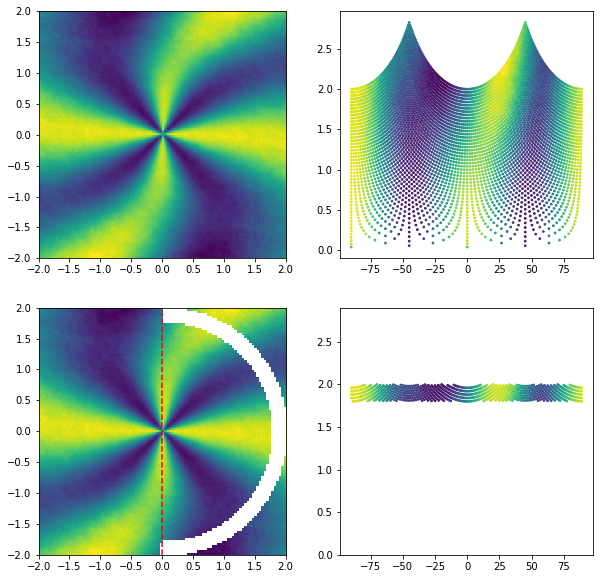

In [7]:
f, a = plt.subplots(2,2, figsize=(10,10))

vmax=max(kk_b.xim.flatten())
vmin=min(kk_b.xim.flatten())

a[0,0].imshow(kk_b.xim, extent=[-kk_b.max_sep, kk_b.max_sep, -kk_b.max_sep, kk_b.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)

a[0,1].scatter(polarKk_b.theta, polarKk_b.r, c=polarKk_b.xiM, vmin=vmin, vmax=vmax, s=3)

a[1,0].imshow(kk_b.xim, extent=[-kk_b.max_sep, kk_b.max_sep, -kk_b.max_sep, kk_b.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)
a[1,0].scatter(ann_b.r * np.cos(ann_b.theta * np.pi/180),
               ann_b.r * np.sin(ann_b.theta * np.pi/180), marker='s', color='w', s=10)
a[1,0].axvline(0, linestyle='--', color='r')

a[1,1].scatter(ann_b.theta, ann_b.r, c=ann_b.xiM, s=3, vmin=vmin, vmax=vmax)
a[1,1].set_ylim([0,2.9]);

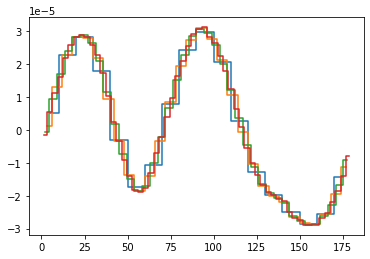

In [8]:
for bins in [18,30,40,58]:
    _,annHistM, annbins = polar.get2pcfSlice(ann_b, bins, True)
    plt.plot(annbins, annHistM, ds='steps-mid')

### SMALL SCALES

In [11]:
kk_s = polar.compGG2pcf(d['thx'], d['thy'], d['e1'], d['e2'], 'small', 'TwoD')
polarKk_s = polar.get2pcfPolar(kk_s, True)
ann_s = polar.get2pcfAnnulus(polarKk_s, 0.05, .05, True)
annHist_s = polar.get2pcfSlice(ann_s, 18, True)

## xi plus

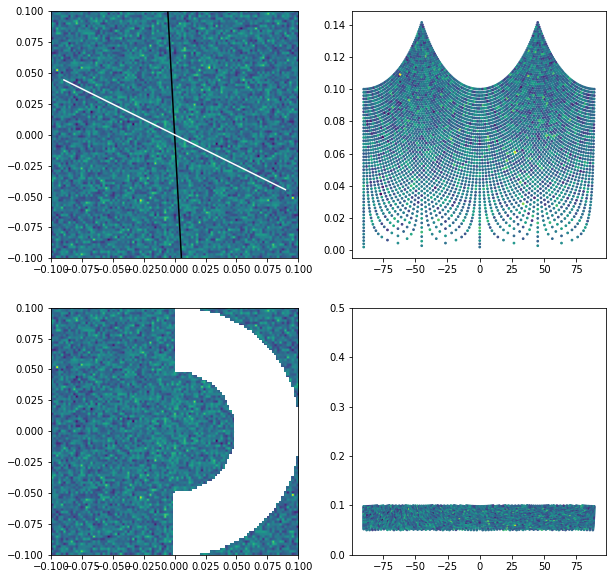

In [13]:
f, a = plt.subplots(2,2, figsize=(10,10))

vmax=max(kk_s.xip.flatten())
vmin=min(kk_s.xip.flatten())

a[0,0].imshow(kk_s.xip, extent=[-kk_s.max_sep, kk_s.max_sep, -kk_s.max_sep, kk_s.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)
xs = np.linspace(-0.1,0.1,100)
a[0,0].plot(xs * np.cos(alpha_gl), xs * np.sin(alpha_gl), 'k')
a[0,0].plot(xs * np.cos(alpha_fa), xs * np.sin(alpha_fa), 'w')

a[0,1].scatter(polarKk_s.theta, polarKk_s.r, c=polarKk_s.xiP, vmin=vmin, vmax=vmax, s=3)

a[1,0].imshow(kk_s.xip, extent=[-kk_s.max_sep, kk_s.max_sep, -kk_s.max_sep, kk_s.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)
a[1,0].scatter(ann_s.r * np.cos(ann_s.theta*np.pi/180), ann_s.r * np.sin(ann_s.theta*np.pi/180), marker='s', color='w', s=10)

a[1,1].scatter(ann_s.theta, ann_s.r, c=ann_s.xiP, s=3, vmin=vmin, vmax=vmax)
a[1,1].set_ylim([0,0.5]);

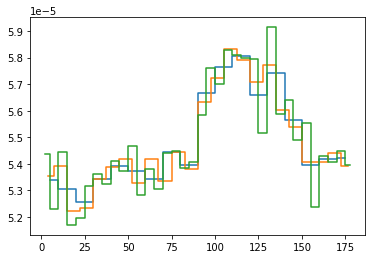

In [11]:
for bins in [18,24,36]:
    annHistP,_, annbins = polar.get2pcfSlice(ann_s, bins, True)
    plt.plot(annbins, annHistP, ds='steps-mid')

## xi minus

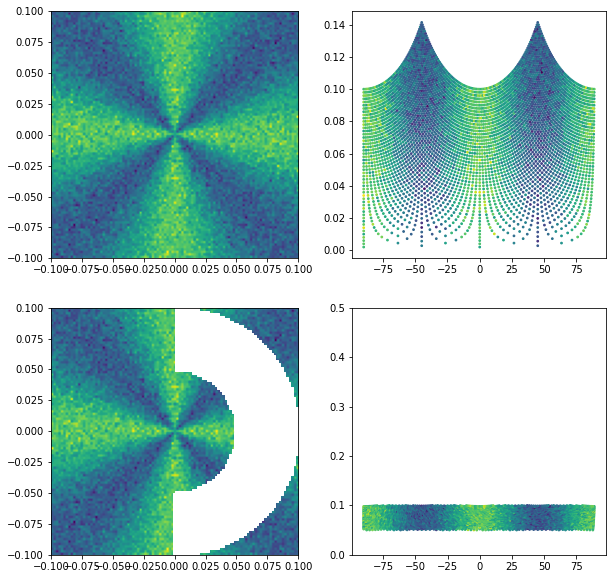

In [12]:
f, a = plt.subplots(2,2, figsize=(10,10))

vmax=max(kk_s.xim.flatten())
vmin=min(kk_s.xim.flatten())

a[0,0].imshow(kk_s.xim, extent=[-kk_s.max_sep, kk_s.max_sep, -kk_s.max_sep, kk_s.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)

a[0,1].scatter(polarKk_s.theta, polarKk_s.r, c=polarKk_s.xiM, vmin=vmin, vmax=vmax, s=3)

a[1,0].imshow(kk_s.xim, extent=[-kk_s.max_sep, kk_s.max_sep, -kk_s.max_sep, kk_s.max_sep], 
              origin='lower', vmin=vmin, vmax=vmax)
a[1,0].scatter(ann_s.r * np.cos(ann_s.theta*np.pi/180), ann_s.r * np.sin(ann_s.theta*np.pi/180), marker='s', color='w', s=10)

a[1,1].scatter(ann_s.theta, ann_s.r, c=ann_s.xiM, s=3, vmin=vmin, vmax=vmax)
a[1,1].set_ylim([0,0.5]);

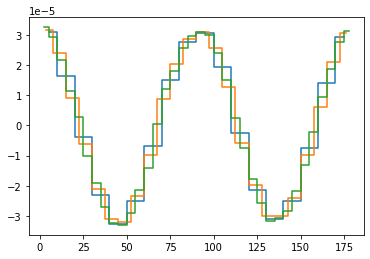

In [13]:
for bins in [18,24,36]:
    _, annHistM, annbins = polar.get2pcfSlice(ann_s, bins, True)
    plt.plot(annbins, annHistM, ds='steps-mid')